In [1]:
# Section must be included at the beginning of each new notebook. Remember to change the app name. 
# If you're using VirtualBox, change the below to '/home/user/spark-2.1.1-bin-hadoop2.7'
import findspark
findspark.init('/opt/spark')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('basics').getOrCreate()

In [2]:
# Let's read in the data. If you open the dataset, you'll find that each column has a header. We specify that by stating that header=True.
# To make our lives easier, we can also use 'inferSchema' when importing CSVs. This automatically detects data types.
# If you would like to manually change data types, refer to this article: https://medium.com/@mrpowers/adding-structtype-columns-to-spark-dataframes-b44125409803
df = spark.read.csv('Datasets/Accidents_2015.csv',header=True,inferSchema=True)

# 1. Basic Data Exploration
# 1. DataFrame Manipulations

Now that we've started the session and imported the data, let's explore the data.

### 1.1 Show first n observation
We can use head operation to see first 2 observation

In [28]:
# The show method allows you visualise DataFrames in a tabular format. 
# df.show()
df.show(2,truncate= True)

+--------------+---------------------+----------------------+---------+---------+------------+-----------------+------------------+--------------------+----------+-----------+-----+--------------------------+-------------------------+--------------+---------------+---------+-----------+---------------+----------------+--------------+---------------+---------------------------------+---------------------------------------+----------------+------------------+-----------------------+--------------------------+-------------------+-------------------+-------------------------------------------+-------------------------+
|Accident_Index|Location_Easting_OSGR|Location_Northing_OSGR|Longitude| Latitude|Police_Force|Accident_Severity|Number_of_Vehicles|Number_of_Casualties|      Date|Day_of_Week| Time|Local_Authority_(District)|Local_Authority_(Highway)|1st_Road_Class|1st_Road_Number|Road_Type|Speed_limit|Junction_Detail|Junction_Control|2nd_Road_Class|2nd_Road_Number|Pedestrian_Crossing-Human_

### 1.2 Datatype of columns
To see the types of columns in DataFrame, we can use the printSchema, dtypes. Let’s apply printSchema() on df which will Print the schema in a tree format.

In [29]:
# Print schema allows us to visualise the data structure at a high level. 
df.printSchema()

# We can also use head to print a specific amount of rows, so we can get a better understanding of the data points. 
# Note that we have to specify 'print' depending on the method we're using. Otherwise it may not show up!
print(df.head(1))

root
 |-- Accident_Index: string (nullable = true)
 |-- Location_Easting_OSGR: integer (nullable = true)
 |-- Location_Northing_OSGR: integer (nullable = true)
 |-- Longitude: double (nullable = true)
 |-- Latitude: double (nullable = true)
 |-- Police_Force: integer (nullable = true)
 |-- Accident_Severity: integer (nullable = true)
 |-- Number_of_Vehicles: integer (nullable = true)
 |-- Number_of_Casualties: integer (nullable = true)
 |-- Date: string (nullable = true)
 |-- Day_of_Week: integer (nullable = true)
 |-- Time: string (nullable = true)
 |-- Local_Authority_(District): integer (nullable = true)
 |-- Local_Authority_(Highway): string (nullable = true)
 |-- 1st_Road_Class: integer (nullable = true)
 |-- 1st_Road_Number: integer (nullable = true)
 |-- Road_Type: integer (nullable = true)
 |-- Speed_limit: integer (nullable = true)
 |-- Junction_Detail: integer (nullable = true)
 |-- Junction_Control: integer (nullable = true)
 |-- 2nd_Road_Class: integer (nullable = true)
 |-

### 1.3 Count the number of rows in DataFrame
We can use count operation to count the number of rows in DataFrame. Let’s apply count operation on train & test files to count the number of rows.

In [30]:
# Let's see how many rows of data we originally have.
print("Total data points:", df.count())

Total data points: 140056


### 1.4 Data Columns Exploration
For getting the columns name we can use columns on DataFrame, similar to what we do for getting the columns in pandas DataFrame. Let’s first print the number of columns and columns name  in train file then in test file.

In [31]:
len(df.columns), df.columns

(32,
 ['Accident_Index',
  'Location_Easting_OSGR',
  'Location_Northing_OSGR',
  'Longitude',
  'Latitude',
  'Police_Force',
  'Accident_Severity',
  'Number_of_Vehicles',
  'Number_of_Casualties',
  'Date',
  'Day_of_Week',
  'Time',
  'Local_Authority_(District)',
  'Local_Authority_(Highway)',
  '1st_Road_Class',
  '1st_Road_Number',
  'Road_Type',
  'Speed_limit',
  'Junction_Detail',
  'Junction_Control',
  '2nd_Road_Class',
  '2nd_Road_Number',
  'Pedestrian_Crossing-Human_Control',
  'Pedestrian_Crossing-Physical_Facilities',
  'Light_Conditions',
  'Weather_Conditions',
  'Road_Surface_Conditions',
  'Special_Conditions_at_Site',
  'Carriageway_Hazards',
  'Urban_or_Rural_Area',
  'Did_Police_Officer_Attend_Scene_of_Accident',
  'LSOA_of_Accident_Location'])

### 1.5 Summary Statistics of  DataFrame
How to get the summary statistics (mean, standard deviance, min ,max , count) of numerical columns in a DataFrame?
describe operation is use to calculate the summary statistics of numerical column(s) in DataFrame. If we don’t specify the name of columns it will calculate summary statistics for all numerical columns present in DataFrame.

In [32]:
# We can use the describe method get some general statistics on our data too. 
# df.describe().show()
df.describe('Accident_Severity','Speed_limit','Number_of_Vehicles', 'Number_of_Casualties').show()

+-------+------------------+------------------+------------------+--------------------+
|summary| Accident_Severity|       Speed_limit|Number_of_Vehicles|Number_of_Casualties|
+-------+------------------+------------------+------------------+--------------------+
|  count|            140056|            140056|            140056|              140056|
|   mean|2.8338521734163478|38.175586908093905| 1.841013594562175|  1.3293896727023475|
| stddev|0.4020203526775765| 13.90364644889059|0.7100458769233198|  0.7954265142745931|
|    min|                 1|                 0|                 1|                   1|
|    max|                 3|                70|                37|                  38|
+-------+------------------+------------------+------------------+--------------------+



### 1.6 What if I want to calculate pair wise frequency of categorical columns?
We can use crosstab operation on DataFrame to calculate the pair wise frequency of columns. Let’s apply crosstab operation on ‘Age’ and ‘Gender’ columns of train DataFrame.

In [33]:
df.crosstab('Speed_limit', 'Accident_Severity').show()

+-----------------------------+---+-----+-----+
|Speed_limit_Accident_Severity|  1|    2|    3|
+-----------------------------+---+-----+-----+
|                            0|  0|    0|    1|
|                           10|  0|    0|    2|
|                           20| 12|  645| 3633|
|                           60|576| 3975|14530|
|                           70|198| 1276| 8152|
|                           50|118|  869| 4638|
|                           40|189| 1776| 9839|
|                           30|523|11497|77607|
+-----------------------------+---+-----+-----+



In the above output, the first column of each row will be the distinct values of Age and the column names will be the distinct values of Gender. The name of the first column will be Age_Gender. Pair with no occurrences will have zero count in contingency table.

In [34]:
df.crosstab('Number_of_Vehicles', 'Accident_Severity').show()

+------------------------------------+---+----+-----+
|Number_of_Vehicles_Accident_Severity|  1|   2|    3|
+------------------------------------+---+----+-----+
|                                   5| 16|  97|  474|
|                                  10|  0|   2|    3|
|                                  37|  1|   0|    0|
|                                  14|  0|   1|    0|
|                                   1|701|8377|32038|
|                                   6|  1|  35|  117|
|                                   9|  0|   2|    7|
|                                  13|  0|   0|    1|
|                                   2|681|9867|74067|
|                                  12|  0|   0|    1|
|                                   7|  1|  12|   34|
|                                   3|161|1344| 9559|
|                                  16|  0|   0|    1|
|                                  11|  1|   1|    0|
|                                   8|  0|   5|   12|
|                           

In the above output, the first column of each row will be the distinct values of Age and the column names will be the distinct values of Gender. The name of the first column will be Age_Gender. Pair with no occurrences will have zero count in contingency table.

In [35]:
df.crosstab('Number_of_Casualties', 'Accident_Severity').show()

+--------------------------------------+---+-----+-----+
|Number_of_Casualties_Accident_Severity|  1|    2|    3|
+--------------------------------------+---+-----+-----+
|                                     5| 44|  195|  593|
|                                    10|  0|    6|    4|
|                                    24|  0|    1|    0|
|                                    14|  0|    0|    2|
|                                     1|989|15335|93071|
|                                     6| 10|   80|  191|
|                                    38|  0|    1|    0|
|                                    21|  0|    0|    1|
|                                     9|  3|    6|   13|
|                                    13|  0|    1|    1|
|                                     2|335| 2878|17925|
|                                    34|  0|    1|    0|
|                                    17|  0|    0|    3|
|                                    12|  0|    1|    2|
|                              

In the above output, the first column of each row will be the distinct values of Age and the column names will be the distinct values of Gender. The name of the first column will be Age_Gender. Pair with no occurrences will have zero count in contingency table.

# 2. Data Exploration

In [36]:
date_time = df.select('Day_of_Week','Time')
date_time.na.drop().show()
date_time.count()
date_time = df.select('Day_of_Week', df['Time'].substr(0, 2).alias("Time"))
date_time.show()


+-----------+-----+
|Day_of_Week| Time|
+-----------+-----+
|          2|18:45|
|          2|07:50|
|          2|18:08|
|          3|07:40|
|          6|07:30|
|          5|09:56|
|          5|09:09|
|          1|15:30|
|          6|06:20|
|          3|15:44|
|          6|22:39|
|          5|08:10|
|          4|18:05|
|          4|13:38|
|          6|10:57|
|          6|17:15|
|          6|13:34|
|          1|01:50|
|          7|16:16|
|          6|15:25|
+-----------+-----+
only showing top 20 rows

+-----------+----+
|Day_of_Week|Time|
+-----------+----+
|          2|  18|
|          2|  07|
|          2|  18|
|          3|  07|
|          6|  07|
|          5|  09|
|          5|  09|
|          1|  15|
|          6|  06|
|          3|  15|
|          6|  22|
|          5|  08|
|          4|  18|
|          4|  13|
|          6|  10|
|          6|  17|
|          6|  13|
|          1|  01|
|          7|  16|
|          6|  15|
+-----------+----+
only showing top 20 rows



In [37]:
dateTimePandas = date_time.toPandas()  
dateTimePandas["Day_of_Week"] = dateTimePandas["Day_of_Week"].astype(str)
dateTimePandas['Day'] = dateTimePandas["Day_of_Week"]
dateTimePandas["Day_of_Week"] = dateTimePandas["Day_of_Week"].replace("1", "Sunday")
dateTimePandas["Day_of_Week"] = dateTimePandas["Day_of_Week"].replace("2", "Monday")
dateTimePandas["Day_of_Week"] = dateTimePandas["Day_of_Week"].replace("3", "Tuesday")
dateTimePandas["Day_of_Week"] = dateTimePandas["Day_of_Week"].replace("4", "Wednesday")
dateTimePandas["Day_of_Week"] = dateTimePandas["Day_of_Week"].replace("5", "Thursday")
dateTimePandas["Day_of_Week"] = dateTimePandas["Day_of_Week"].replace("6", "Friday")
dateTimePandas["Day_of_Week"] = dateTimePandas["Day_of_Week"].replace("7", "Saturday")
import pandas as pd
# Using .ctrosstab() to create a pivot table
df_pivot = pd.crosstab(dateTimePandas["Day_of_Week"], dateTimePandas["Time"])
df_pivot = df_pivot.reindex(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
df_pivot


Time,00,01,02,03,04,05,06,07,08,09,...,14,15,16,17,18,19,20,21,22,23
Day_of_Week,,,,,,,,,,,,,,,,,,,,,
Monday,212,138,73,77,79,175,437,1096,1726,1031,...,1199,1632,1776,1902,1429,992,714,509,414,277
Tuesday,194,109,76,61,57,176,459,1239,1993,1204,...,1128,1675,1840,2222,1613,1135,757,556,467,292
Wednesday,158,108,60,67,64,180,529,1307,2095,1185,...,1168,1619,1880,2137,1513,1106,718,559,460,311
Thursday,213,142,102,105,90,152,449,1243,1927,1050,...,1206,1670,1889,2113,1691,1194,804,564,504,366
Friday,216,157,114,79,73,172,426,1004,1667,1025,...,1421,1936,1908,2022,1568,1202,887,695,646,540
Saturday,432,357,325,240,182,189,222,348,514,771,...,1272,1213,1180,1250,1185,980,700,632,641,574
Sunday,517,418,334,290,224,195,229,293,331,522,...,1117,1095,1122,1087,907,731,651,522,409,302


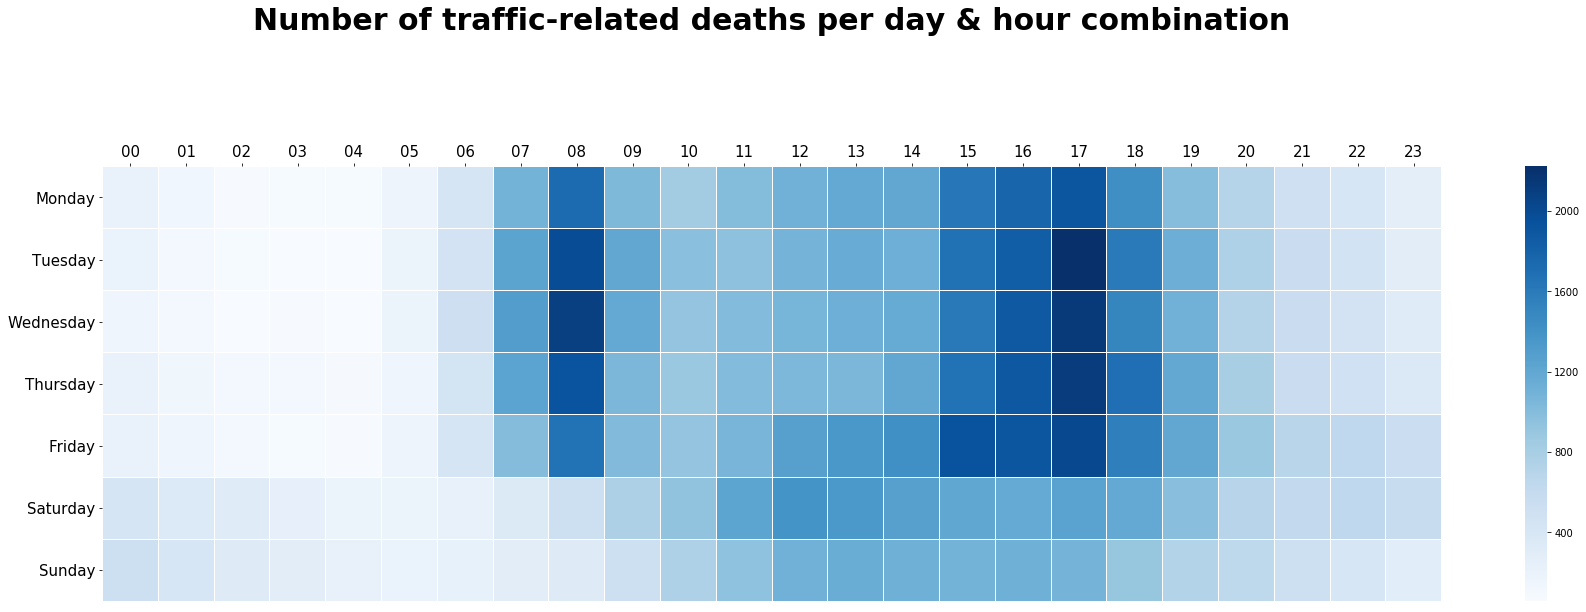

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(figsize=(30,8))
graph = sns.heatmap(df_pivot, cmap="Blues", linecolor="white", linewidths=0.1)

ax.set_title("Number of traffic-related deaths per day & hour combination", y=1.3, fontsize=30, fontweight="bold")
ax.set_xlabel("")
ax.set_ylabel("")

#from matplotlib import rcParams
#rcParams['axes.titlepad'] = 130 # Space between the title and graph

locs, labels = plt.yticks() # Rotating row labels
plt.setp(labels, rotation=0) # Rotating row labels

ax.xaxis.tick_top() # x axis on top
ax.xaxis.set_label_position('top') # x axis on top

graph.tick_params(axis='both',labelsize=15) # Tick label size
graph

We can see that the traffic accident happend during rush hours.... todo..

# 3. Data Exploration

In [39]:
casualtiesVehicles = df.select('Number_of_Casualties','Number_of_Vehicles','Location_Easting_OSGR')
casualtiesVehiclesPandas = casualtiesVehicles.toPandas()  

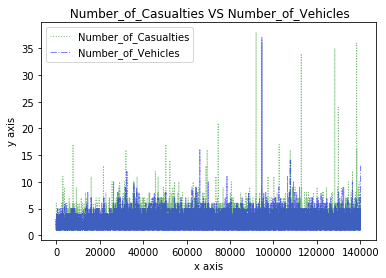

In [40]:
#Line Plot
casualtiesVehiclesPandas.Number_of_Casualties.plot(kind='line',color ='g',label='Number_of_Casualties',linewidth=1,alpha=0.5,grid=True,linestyle= ':')
casualtiesVehiclesPandas.Number_of_Vehicles.plot(color='blue',label='Number_of_Vehicles',linewidth=1,alpha=0.5,linestyle='-.')
plt.legend(loc='upper left')
plt.xlabel('x axis')
plt.ylabel('y axis')
plt.title(' Number_of_Casualties VS Number_of_Vehicles')
plt.show()

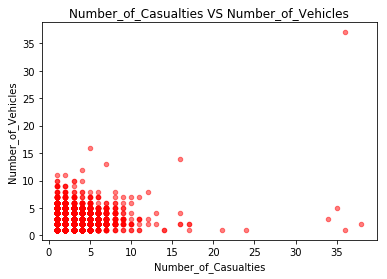

In [41]:
#Scatter Plot
casualtiesVehiclesPandas.plot(kind='scatter',x='Number_of_Casualties',y='Number_of_Vehicles',alpha=0.5,color='red')
plt.xlabel('Number_of_Casualties')
plt.ylabel('Number_of_Vehicles')
plt.title('Number_of_Casualties VS Number_of_Vehicles')
plt.show()

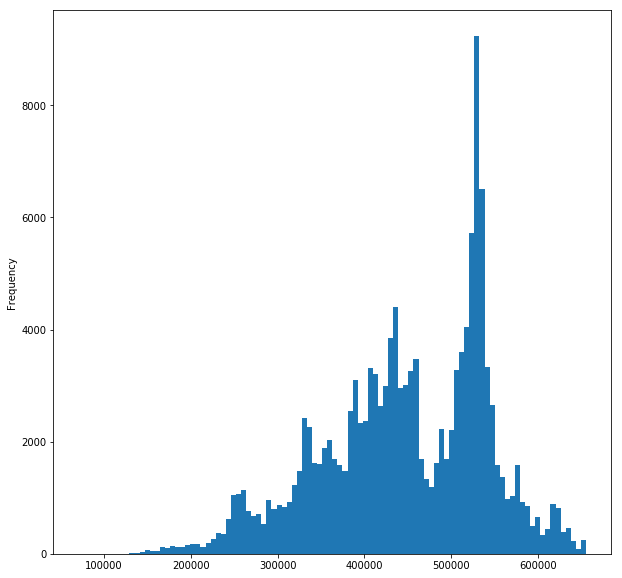

In [42]:
#Histogram
casualtiesVehiclesPandas.Location_Easting_OSGR.plot(kind='hist',bins=100,figsize=(10,10))
plt.show()

# 4. Accident Location

In [43]:
Accident_location = df.select('Accident_Severity','Longitude','Latitude')

In [44]:
Accident_locationPandas = Accident_location.toPandas()

In [45]:
level3 = Accident_locationPandas[Accident_locationPandas['Accident_Severity'] == 3]
level2 = Accident_locationPandas[Accident_locationPandas['Accident_Severity'] == 2]
level1 = Accident_locationPandas[Accident_locationPandas['Accident_Severity'] == 1]

In [46]:
print(level3.count())
print(level2.count())
print(level1.count())

Accident_Severity    118402
Longitude            118378
Latitude             118378
dtype: int64
Accident_Severity    20038
Longitude            20035
Latitude             20035
dtype: int64
Accident_Severity    1616
Longitude            1616
Latitude             1616
dtype: int64


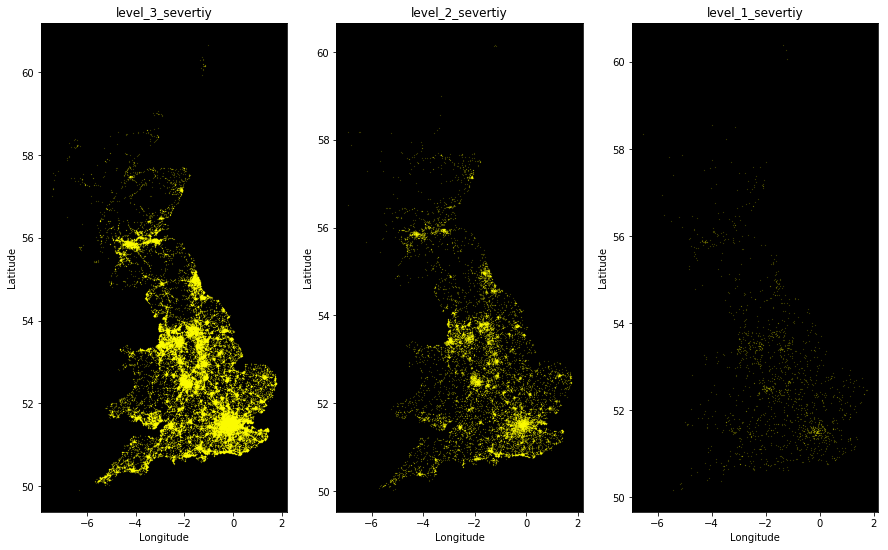

# 5. Accident Location

In [3]:
# accidentLocatePandas = df.select('LSOA_of_Accident_Location').toPandas()

accidentLocatePandas = df.filter("LSOA_of_Accident_Location == 'E01004736'").toPandas()
accidentLocatePandas=accidentLocatePandas.dropna(subset=['Longitude'])
accidentLocatePandas=accidentLocatePandas.dropna(subset=['Latitude'])
accidentLocatePandas.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
0,201501CW10006,530020,180360,-0.127933,51.507221,1,3,2,1,13/01/2015,...,0,5,1,1,1,0,0,1,1,E01004736
1,201501CW10040,529720,180340,-0.132261,51.507111,1,3,2,1,20/01/2015,...,0,1,1,1,1,0,0,1,1,E01004736
2,201501CW10059,529200,180440,-0.139713,51.508128,1,3,2,1,24/01/2015,...,0,5,4,1,1,0,0,1,1,E01004736
3,201501CW10061,529790,180400,-0.131231,51.507634,1,3,2,2,25/01/2015,...,0,5,4,1,1,0,0,1,1,E01004736
4,201501CW10097,529650,180820,-0.133093,51.511440,1,3,2,2,31/01/2015,...,0,5,1,2,2,0,0,1,1,E01004736


In [4]:
location = accidentLocatePandas['Latitude'].mean(), accidentLocatePandas['Longitude'].mean()
import folium
#A basemap is then created using the location to centre on and the zoom level to start.
m = folium.Map(location=location,zoom_start=15)


In [5]:
accidentLocatePandas=accidentLocatePandas.dropna(subset=['Longitude'])
accidentLocatePandas=accidentLocatePandas.dropna(subset=['Latitude'])

In [6]:
def fancy_html(row):
    i = row
    
    Number_of_Vehicles = accidentLocatePandas['Number_of_Vehicles'].iloc[i]                             
    Number_of_Casualties = accidentLocatePandas['Accident_Severity'].iloc[i]                           
    Date = accidentLocatePandas['Date'].iloc[i]
    Time = accidentLocatePandas['Time'].iloc[i]                                           
    Light_Conditions = accidentLocatePandas['Light_Conditions'].iloc[i]                               
    Weather_Conditions = accidentLocatePandas['Weather_Conditions'].iloc[i]                             
    Road_Surface_Conditions = accidentLocatePandas['Road_Surface_Conditions'].iloc[i]
    
    left_col_colour = "#2A799C"
    right_col_colour = "#C5DCE7"
    
    html = """<!DOCTYPE html>
<html>

<head>
<h4 style="margin-bottom:0"; width="300px">{}</h4>""".format(Date) + """

</head>
    <table style="height: 126px; width: 300px;">
<tbody>
<tr>
<td style="background-color: """+ left_col_colour +""";"><span style="color: #ffffff;">Number of Vehicles</span></td>
<td style="width: 200px;background-color: """+ right_col_colour +""";">{}</td>""".format(Number_of_Vehicles) + """
</tr>
<tr>
<td style="background-color: """+ left_col_colour +""";"><span style="color: #ffffff;">Accident Severity</span></td>
<td style="width: 200px;background-color: """+ right_col_colour +""";">{}</td>""".format(Number_of_Casualties) + """
</tr>
<tr>
<td style="background-color: """+ left_col_colour +""";"><span style="color: #ffffff;">Time</span></td>
<td style="width: 200px;background-color: """+ right_col_colour +""";">{}</td>""".format(Time) + """
</tr>
<tr>
<td style="background-color: """+ left_col_colour +""";"><span style="color: #ffffff;">Light Conditions</span></td>
<td style="width: 200px;background-color: """+ right_col_colour +""";">{}</td>""".format(Light_Conditions) + """
</tr>
<tr>
<td style="background-color: """+ left_col_colour +""";"><span style="color: #ffffff;">Weather Conditions</span></td>
<td style="width: 200px;background-color: """+ right_col_colour +""";">{}</td>""".format(Weather_Conditions) + """
</tr>
<tr>
<td style="background-color: """+ left_col_colour +""";"><span style="color: #ffffff;">Road Conditions</span></td>
<td style="width: 200px;background-color: """+ right_col_colour +""";">{}</td>""".format(Road_Surface_Conditions) + """
</tr>
</tbody>
</table>
</html>
"""
    return html

In [11]:
import branca


for i in range(0,len(accidentLocatePandas)):
    
    accident_Severity = accidentLocatePandas['Accident_Severity'].iloc[i]
    if accident_Severity == 1:
        color = 'blue'
    elif accident_Severity == 2:
        color = 'green'
    else:
        color = 'red'
    
    html = fancy_html(i)
 
    iframe = branca.element.IFrame(html=html,width=400,height=300)
    popup = folium.Popup(iframe,parse_html=True)
    
    folium.Marker([accidentLocatePandas['Latitude'].iloc[i],accidentLocatePandas['Longitude'].iloc[i]],
                  popup=popup,icon=folium.Icon(color=color, icon='info-sign')).add_to(m)

m

In [8]:
data_heat = accidentLocatePandas[['Latitude','Longitude','Accident_Severity']].values.tolist()

In [9]:
data_heat[0]

[51.507221, -0.127933, 3.0]

In [10]:
import folium.plugins as plugins

m = folium.Map(location=location, zoom_start=15)
#tiles='stamentoner'

plugins.HeatMap(data_heat).add_to(m)

m

# 5. Accident Location

In [4]:
# Let's select the columns that are integers, and use the describe method again.
# We see that the average age is 41. The average bank account balance is $1,074. 
# And they spoke to call centre reps for approx. 931 seconds on average. 
df.select('1st_Road_Number', 'Road_Type', 'Day_of_Week').describe().show()

+-------+------------------+------------------+-----------------+
|summary|   1st_Road_Number|         Road_Type|      Day_of_Week|
+-------+------------------+------------------+-----------------+
|  count|            140056|            140056|           140056|
|   mean| 982.2686568229851| 5.169182327069172|4.094962015193922|
| stddev|1793.4760788594278|1.6474503020310935|1.911278724810604|
|    min|                 0|                 1|                1|
|    max|              9914|                 9|                7|
+-------+------------------+------------------+-----------------+



# Dropping Rows - Missing Data Point
Spark can drop any row with missing data. Let's see how that's done!

In [5]:
# 'na' stands for Not Available. Using na, we can then use drop. 
# After using show, you'll find that the rows with the null values are gone. 
df.na.drop().show()

# Let's see how many rows of data we have now. 
print("Total data points:", df.count())

+--------------+---------------------+----------------------+---------+---------+------------+-----------------+------------------+--------------------+----------+-----------+-----+--------------------------+-------------------------+--------------+---------------+---------+-----------+---------------+----------------+--------------+---------------+---------------------------------+---------------------------------------+----------------+------------------+-----------------------+--------------------------+-------------------+-------------------+-------------------------------------------+-------------------------+
|Accident_Index|Location_Easting_OSGR|Location_Northing_OSGR|Longitude| Latitude|Police_Force|Accident_Severity|Number_of_Vehicles|Number_of_Casualties|      Date|Day_of_Week| Time|Local_Authority_(District)|Local_Authority_(Highway)|1st_Road_Class|1st_Road_Number|Road_Type|Speed_limit|Junction_Detail|Junction_Control|2nd_Road_Class|2nd_Road_Number|Pedestrian_Crossing-Human_

Total data points: 140056


In [9]:
# Oops! Forgot to assign the result to a variable. Let's try that again. Now you can see that 7 rows have been removed.
dropped_df = df.na.drop()
dropped_df.show()
print("Total data points:", dropped_df.count())

+--------------+---------------------+----------------------+---------+---------+------------+-----------------+------------------+--------------------+----------+-----------+-----+--------------------------+-------------------------+--------------+---------------+---------+-----------+---------------+----------------+--------------+---------------+---------------------------------+---------------------------------------+----------------+------------------+-----------------------+--------------------------+-------------------+-------------------+-------------------------------------------+-------------------------+
|Accident_Index|Location_Easting_OSGR|Location_Northing_OSGR|Longitude| Latitude|Police_Force|Accident_Severity|Number_of_Vehicles|Number_of_Casualties|      Date|Day_of_Week| Time|Local_Authority_(District)|Local_Authority_(Highway)|1st_Road_Class|1st_Road_Number|Road_Type|Speed_limit|Junction_Detail|Junction_Control|2nd_Road_Class|2nd_Road_Number|Pedestrian_Crossing-Human_

Total data points: 131144


# Dropping Rows - Missing Field
What about data missing in a particular field?

Using subset, we're able to specify that if data in a particular feature is missing, then the entire row should be dropped. Let's see how that works.

In [10]:
missing_field_df = df.na.drop(subset="Accident_Severity")
missing_field_df.show()
print("Total data points:", missing_field_df.count())

+--------------+---------------------+----------------------+---------+---------+------------+-----------------+------------------+--------------------+----------+-----------+-----+--------------------------+-------------------------+--------------+---------------+---------+-----------+---------------+----------------+--------------+---------------+---------------------------------+---------------------------------------+----------------+------------------+-----------------------+--------------------------+-------------------+-------------------+-------------------------------------------+-------------------------+
|Accident_Index|Location_Easting_OSGR|Location_Northing_OSGR|Longitude| Latitude|Police_Force|Accident_Severity|Number_of_Vehicles|Number_of_Casualties|      Date|Day_of_Week| Time|Local_Authority_(District)|Local_Authority_(Highway)|1st_Road_Class|1st_Road_Number|Road_Type|Speed_limit|Junction_Detail|Junction_Control|2nd_Road_Class|2nd_Road_Number|Pedestrian_Crossing-Human_

Total data points: 140056


# 6. Correlation toto

# 7. Model Selection

In [12]:
import pandas as pd
pd.DataFrame(dropped_df.take(5), columns=dropped_df.columns).transpose()

,0,1,2,3,4
Accident_Index,201501BS70001,201501BS70002,201501BS70004,201501BS70005,201501BS70008
Location_Easting_OSGR,525130,526530,524610,524420,524630
Location_Northing_OSGR,180050,178560,181080,181080,179040
Longitude,-0.198465,-0.178838,-0.20559,-0.208327,-0.206022
Latitude,51.5055,51.4918,51.5149,51.515,51.4966
Police_Force,1,1,1,1,1
Accident_Severity,3,3,3,3,2
Number_of_Vehicles,1,1,1,1,2
Number_of_Casualties,1,1,1,1,1
Date,12/01/2015,12/01/2015,12/01/2015,13/01/2015,09/01/2015


In [13]:
numeric_features = [t[0] for t in dropped_df.dtypes if t[1] == 'int']
df.select(numeric_features).describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
Location_Easting_OSGR,140029,446913.8960858108,94893.2641957332,70860,655282
Location_Northing_OSGR,140029,289904.25219775905,157793.2106429791,10628,1197917
Police_Force,140056,29.90204632432741,25.217637402865137,1,98
Accident_Severity,140056,2.8338521734163478,0.40202035267758074,1,3
Number_of_Vehicles,140056,1.841013594562175,0.7100458769233176,1,37
Number_of_Casualties,140056,1.3293896727023475,0.795426514274589,1,38
Day_of_Week,140056,4.094962015193922,1.911278724810604,1,7
Local_Authority_(District),140056,343.6489047238247,258.4383670814979,1,941
1st_Road_Class,140056,4.102965956474553,1.4378814159294342,1,6


Correlations between independent variables.

In [85]:

features = ['road_surface_conditions','light_conditions','weather_conditions',
          'accident_severity','day_of_week']
df = df.select( *features).limit(800)

In [86]:
# features = ['special_conditions_at_site','road_surface_conditions','light_conditions','weather_conditions',
#           'accident_severity','day_of_week']
# df = df.select( *features)



# df = df.withColumn('accident_severity',df['accident_severity'].cast("string"))
df.printSchema()
df.toPandas().transpose()

root
 |-- road_surface_conditions: integer (nullable = true)
 |-- light_conditions: integer (nullable = true)
 |-- weather_conditions: integer (nullable = true)
 |-- accident_severity: integer (nullable = true)
 |-- day_of_week: integer (nullable = true)



,0,1,2,3,4,5,6,7,8,9,...,790,791,792,793,794,795,796,797,798,799
road_surface_conditions,1,1,2,2,2,2,2,1,1,1,...,1,1,1,1,1,1,1,1,1,1
light_conditions,4,1,4,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
weather_conditions,1,1,2,1,2,1,8,1,1,8,...,1,1,1,1,1,1,1,1,1,1
accident_severity,3,3,3,3,2,3,3,3,3,3,...,2,3,3,3,3,3,3,2,3,3
day_of_week,2,2,2,3,6,5,5,1,6,3,...,6,5,1,1,4,3,2,3,2,7


In [87]:
df = df.na.drop()

df = df.na.drop(subset="road_surface_conditions")
df = df.na.drop(subset="light_conditions")
df = df.na.drop(subset="weather_conditions")
df = df.na.drop(subset="accident_severity")
df = df.na.drop(subset="day_of_week")
print("Total data points2:", df.count())

Total data points2: 800


In [88]:
df = df.filter(df.road_surface_conditions > 0)
print("Total data points2:", df.count())
df = df.filter(df.light_conditions > 0)
print("Total data points2:", df.count())
df = df.filter(df.weather_conditions > 0)
print("Total data points2:", df.count())
df = df.filter(df.accident_severity > 0)
print("Total data points2:", df.count())
df = df.filter(df.day_of_week > 0)
print("Total data points2:", df.count())

Total data points2: 800
Total data points2: 800
Total data points2: 800
Total data points2: 800
Total data points2: 800
